<a href="https://colab.research.google.com/github/sunshineprakhar/DDA14211/blob/Time-Series/Assignment1_Extended_SAX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Extension of Symbolic Aggregate Approximation**

Reference: https://www.ieice.org/~de/DEWS/DEWS2006/doc/4A-i8.pdf

In the research paper, they extend SAX by adding two special new points, that is, max and min points of each segment, for each
segment to fully represent time series data. Therefore,According to this Extended SAX, three values for each segment,
the original mean values and these additional two new
points, min and max points, are used for time series
data representation.

I have implemented same using the data points that were availaible on the website https://jmotif.github.io/sax-vsm_site/morea/algorithm/SAX.html

As our Extended SAX approach is based SAX, we
can get the mean values of the PAA of the financial
time series. After obtaining PAA, we have the equal
sized segments and its mean values. Then we define
max and min values in the each segment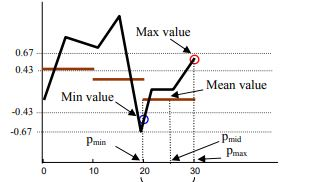

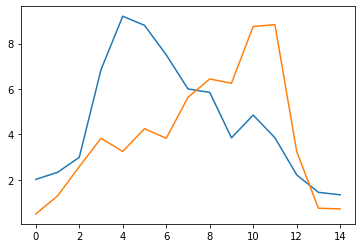

In [1]:
import matplotlib.pyplot as plt
import numpy as np

ts1= [2.02, 2.33, 2.99, 6.85, 9.20, 8.80, 7.50, 6.00, 5.85, 3.85, 4.85, 3.85, 2.22, 1.45, 1.34]
#y = [x for x in range(1,len(ts1)+1)]
ts2=[0.50, 1.29, 2.58, 3.83, 3.25, 4.25, 3.83, 5.63, 6.44, 6.25, 8.75, 8.83, 3.25, 0.75, 0.72]
plt.plot(ts1)
plt.plot(ts2)
plt.show()

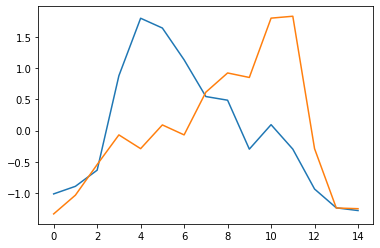

In [2]:
def znorm(ts):
    return (ts-np.mean(ts))/np.std(ts)

ts1_znorm=znorm(ts1)
ts2_znorm=znorm(ts2)

plt.plot(ts1_znorm)
plt.plot(ts2_znorm)
plt.show()

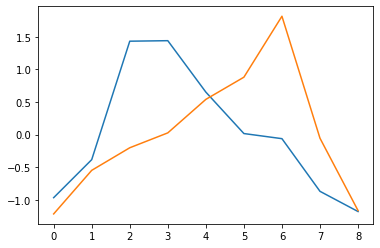

In [3]:
def paa(ts,paa_size):
    """ Function to return the mean value of each segment"""
    if paa_size == len(ts):
        return ts
    else:
        #print("Hi")
        if len(ts) % paa_size == 0:
            #print("inside")
            #print(np.reshape(np.array(ts), (len(ts) // paa_size, paa_size)))
            return np.reshape(np.array(ts), (len(ts) // paa_size, paa_size)).mean(axis=0)
        else:
            res = [int(0)]*(paa_size)
            for i in range(0,len(ts)*paa_size - 1):
                idx = i // len(ts) 
                pos = i // paa_size 
                res[idx] = res[idx] + ts[pos]
                #print(res)
            #print("Start")
            #print("Hi",res)
            #print("End")
            for i in range(0,paa_size):
                res[i] = res[i] / len(ts)
            return res

s1_paa = paa(ts1_znorm,9)
s2_paa = paa(ts2_znorm,9)
plt.plot(s1_paa)
plt.plot(s2_paa)
plt.show()

In [4]:
def find_char(val):
    """ Function to return the character based on the value"""
    if val< -0.67:
        return("a")
    elif val<0:
        return("b")
    elif val<0.67:
        return("c")
    else:
        return("d")

In [5]:
def return_min_max(ts):
    """ Function to return the min and max value of each segment"""
    temp = []
    min_max = []
    for each in ts:
        for _ in range(0,9):
            temp.append(each)
    
    for each in range(0,len(temp),15):
        min_max.append((min(temp[each:each+15]),max(temp[each:each+15])))
    return min_max

min_max_ts1 = return_min_max(ts1_znorm)
min_max_ts2 = return_min_max(ts2_znorm)

**Final Output**

In [10]:
string1 = ""
string2 = ""


for each in range(0,9):
    string1 = string1 + find_char(min_max_ts1[each][0])+find_char(s1_paa[each])+find_char(min_max_ts1[each][1]) + ","
    string2 = string2 + find_char(min_max_ts2[each][0])+find_char(s2_paa[each])+find_char(min_max_ts2[each][1]) + ","
print("Extended SAX transform of ts1 into string through 9-points PAA:\n",string1)
print("Extended SAX transform of ts2 into string through 9-points PAA:\n",string2)

Extended SAX transform of ts1 into string through 9-points PAA:
 aaa,abd,ddd,ddd,ccd,bcc,bbc,aab,aaa,
Extended SAX transform of ts2 into string through 9-points PAA:
 aaa,abb,bbb,bcc,bcd,ddd,ddd,abd,aaa,
